In [18]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
os.getcwd()

'/mnt/f/M-cells/code/WT_AireKO_thymus'

In [21]:
adata = sc.read("/mnt/e/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_KO_all_genes.h5ad")
adata

AnnData object with n_obs × n_vars = 11658 × 23782
    obs: 'batch', 'scrublet_score', 'scrublet_called_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'genotype', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'cell_type'
    var: 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'genotype_colors', 'leiden', 'leiden_scVI_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'scVI_normalized'
    obsp: 'connectivities', 'distances'

In [5]:
TSAs = set(pd.read_csv("/mnt/f/M-cells/Sansom_TSA_Table.csv")["Gene Symbol"])
TSAs = [i for i in TSAs if i in adata.var_names]

# UMAPs

## Feature plots (WT vs KO)

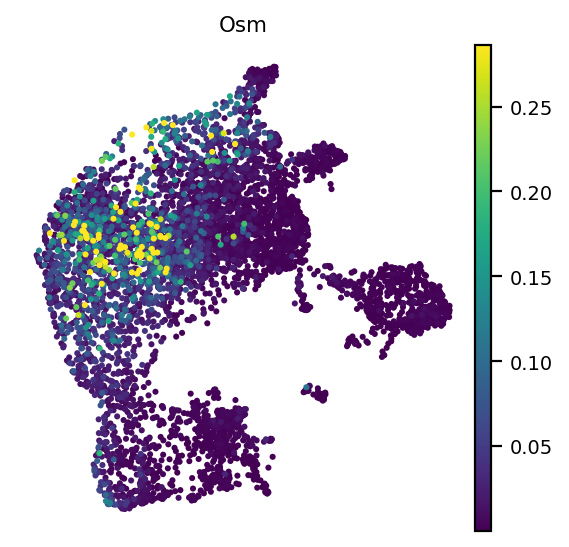

In [16]:
geneList = ["Osm"]
vmin = []
vmax = []
for gene in geneList:
    vmin.append(np.quantile(adata[adata.obs.genotype == "WT", gene].layers["scVI_normalized"], 0.01))
    vmax.append(np.quantile(adata[adata.obs.genotype == "WT", gene].layers["scVI_normalized"], 0.99))
sc.pl.umap(
    adata[adata.obs.genotype == "WT"],
    color=geneList,
    layer="scVI_normalized",
    vmin=vmin,
    vmax=vmax,
    s=30,
)

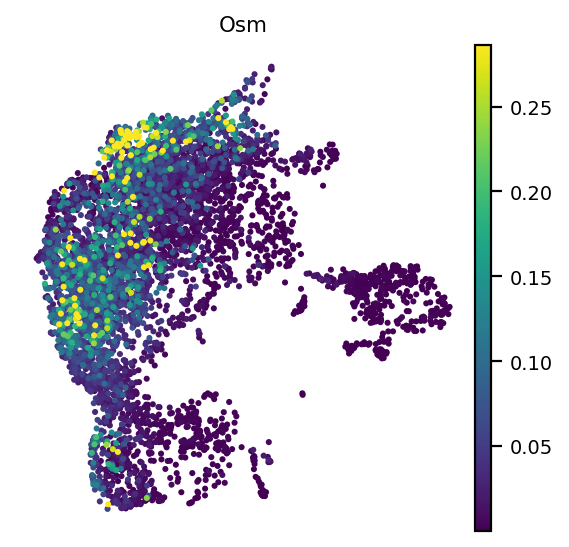

In [17]:
sc.pl.umap(
    adata[adata.obs.genotype == "KO"],
    color=geneList,
    layer="scVI_normalized",
    vmin=vmin,
    vmax=vmax,
    s=30,
)